# 建立地圖

In [32]:
import pandas as pd
import numpy as np
num_range =range(1,19)
map_num={num:np.nan for num in num_range}
#map_num={num:"B" for num in num_range}
id=["owner","level","pass fee","land price","level up"]
map=pd.DataFrame(map_num,id)
map.loc["level", 1:18]=0
map.loc["land price", 1:18] = np.random.randint(300, 601, size=18)
map.loc["level up", 1:18] = map.loc["land price", 1:18] * 0.5
map.loc["pass fee", 1:18] = map.loc["land price", 1:18] * 0.2
print(map)

               1      2      3      4      5      6      7      8      9   \
owner         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
level         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
pass fee     83.0   74.2   61.4  100.4   80.8   77.0   96.4   82.2   66.8   
land price  415.0  371.0  307.0  502.0  404.0  385.0  482.0  411.0  334.0   
level up    207.5  185.5  153.5  251.0  202.0  192.5  241.0  205.5  167.0   

               10     11     12     13     14     15     16     17     18  
owner         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
level         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
pass fee     90.8   87.4  111.4   63.4  106.4   97.8  100.8  111.8  101.4  
land price  454.0  437.0  557.0  317.0  532.0  489.0  504.0  559.0  507.0  
level up    227.0  218.5  278.5  158.5  266.0  244.5  252.0  279.5  253.5  


# 建立玩家資料

In [33]:
data={"money":5000,
      "real estate":0,
      "land":[[],[],[]],
      "location":1}
player_id=["A",
           "B",
           "C"]
player_info=pd.DataFrame(data,player_id)
print(player_info)

   money  real estate land  location
A   5000            0   []         1
B   5000            0   []         1
C   5000            0   []         1


In [3]:
import random
def roll_dice():
    return random.randint(1, 6)

def next_location(cur_location,dice_point):
    if cur_location+dice_point>18:
        return cur_location+dice_point-18
    else: 
        return cur_location+dice_point
def play (player):
    dice_point = roll_dice()
    cur_location=player_info.loc[player,"location"]
    #print(player,cur_location)
    next_location(cur_location,dice_point)
    if  pd.isna(map.loc["owner",next_location(cur_location,dice_point)]):   #判斷土地是否是沒人的
            if player_info.loc[player,"money"]>=map.loc["land price",next_location(cur_location,dice_point)]:#看看錢夠不夠買土地
                #print("buy")
                player_info.loc[player,"money"]-=map.loc["land price",next_location(cur_location,dice_point)]
                player_info.loc[player,"real estate"]+=map.loc["land price",next_location(cur_location,dice_point)]
                player_info.loc[player,"land"].append(next_location(cur_location,dice_point))
                map.loc["owner",next_location(cur_location,dice_point)]=player
                player_info.loc[player,"location"]=next_location(cur_location,dice_point)
    elif  map.loc["owner",next_location(cur_location,dice_point)]==player:#如果是有人的看看是不是自己的
            if player_info.loc[player,"money"]>=map.loc["level up",next_location(cur_location,dice_point)]: #看看錢夠不夠升級土地
                if map.loc["level",next_location(cur_location,dice_point)]<=2:    #看看土地是否高於三級
                    player_info.loc[player,"money"]-=map.loc["level up",next_location(cur_location,dice_point)]
                    map.loc["level",next_location(cur_location,dice_point)]+=1
                    map.loc["pass fee",next_location(cur_location,dice_point)]+=map.loc["land price",next_location(cur_location,dice_point)]*0.3
                    player_info.loc[player,"location"]=next_location(cur_location,dice_point)
    else :              #如果是有人的而且是別人的                                       
            if player_info.loc[player,"money"]>=map.loc["pass fee",next_location(cur_location,dice_point)]: #看看錢夠不夠付過路費
                player_info.loc[player,"money"]-=map.loc["pass fee",next_location(cur_location,dice_point)]
                cur_owner=map.loc["owner",next_location(cur_location,dice_point)]
                player_info.loc[cur_owner,"money"]+=map.loc["pass fee",next_location(cur_location,dice_point)]
                player_info.loc[player,"location"]=next_location(cur_location,dice_point)
            else:
                print("Game Over",player)
                return(404)

In [4]:
status=100
for rounds in range(1000):
    for player_name,player_data in player_info.iterrows():
        status=play(player_name)
        if status==404:
            break
    if status==404:
        break
        
print (player_info)
print (map)

Game Over B
    money  real estate                     land  location
A  5726.5         2563    [2, 6, 12, 15, 17, 4]         4
B   255.2         2122      [7, 11, 14, 10, 18]         1
C  6980.3         3215  [3, 8, 13, 1, 5, 16, 9]         2
               1      2      3      4      5      6      7      8      9   \
owner           C      A      C      A      C      A      B      C      C   
level         3.0    3.0    3.0    3.0    2.0    2.0    1.0    2.0    1.0   
pass fee    506.0  485.1  354.2  466.4  320.0  384.8  186.5  460.8  182.0   
land price  460.0  441.0  322.0  424.0  400.0  481.0  373.0  576.0  364.0   
level up    230.0  220.5  161.0  212.0  200.0  240.5  186.5  288.0  182.0   

               10     11     12     13     14     15     16     17     18  
owner           B      B      A      C      B      A      C      A      B  
level         2.0    3.0    2.0    3.0    3.0    3.0    2.0    3.0    0.0  
pass fee    363.2  475.2  320.8  581.9  555.5  416.9  451.2  480.

In [9]:
import pandas as pd

# 創建DataFrame
data = {'money': [5726.5, 255.2, 6980.3],
        'real estate': [2563, 2122, 3215],
        'land': [[2, 6, 12, 15, 17, 4], [7, 11, 14, 10, 18], [3, 8, 13, 1, 5, 16, 9]],
        'location': [4, 1, 2]}

df = pd.DataFrame(data, index=['A', 'B', 'C'])

# 找到money最多的人的location
max_money_location = df.loc[df['money'].idxmax()]['location']

print("money最多的人的location為:", max_money_location)


money最多的人的location為: 2


# 跑十萬局(已經把初始金額改成5000)

In [21]:
import pandas as pd
import numpy as np
import random


def build_map():
    num_range =range(1,19)
    map_num={num:np.nan for num in num_range}
    id=["owner","level","pass fee","land price","level up"]
    map=pd.DataFrame(map_num,id)
    map.loc["level", 1:18]=0
    map.loc["land price", 1:18] = np.random.randint(300, 601, size=18)
    map.loc["level up", 1:18] = map.loc["land price", 1:18] * 0.5
    map.loc["pass fee", 1:18] = map.loc["land price", 1:18] * 0.2
    return map

def build_player_data(a,b,c):
    data={"money":[5000-a,5000-b,5000-c],                       
          "real estate":0,
          "land":[[],[],[]],
          "location":1}
    player_id=["A",
               "B",
               "C"]
    player_info=pd.DataFrame(data,player_id)
    #print(player_info)
    return player_info
def roll_dice():
    return random.randint(1, 6)

def next_location(cur_location,dice_point):
    if cur_location+dice_point>18:
        return cur_location+dice_point-18
    else: 
        return cur_location+dice_point
def play (player,map,player_info):
    dice_point = roll_dice()
    cur_location=player_info.loc[player,"location"]
    #print(player,cur_location)
    next_location(cur_location,dice_point)
    if  pd.isna(map.loc["owner",next_location(cur_location,dice_point)]):   #判斷土地是否是沒人的
            if player_info.loc[player,"money"]>=map.loc["land price",next_location(cur_location,dice_point)]:#看看錢夠不夠買土地
                #print("buy")
                player_info.loc[player,"money"]-=map.loc["land price",next_location(cur_location,dice_point)]
                player_info.loc[player,"real estate"]+=map.loc["land price",next_location(cur_location,dice_point)]
                player_info.loc[player,"land"].append(next_location(cur_location,dice_point))
                map.loc["owner",next_location(cur_location,dice_point)]=player
                player_info.loc[player,"location"]=next_location(cur_location,dice_point)
    elif  map.loc["owner",next_location(cur_location,dice_point)]==player:#如果是有人的看看是不是自己的
            if player_info.loc[player,"money"]>=map.loc["level up",next_location(cur_location,dice_point)]: #看看錢夠不夠升級土地
                if map.loc["level",next_location(cur_location,dice_point)]<=2:    #看看土地是否高於三級
                    player_info.loc[player,"money"]-=map.loc["level up",next_location(cur_location,dice_point)]
                    map.loc["level",next_location(cur_location,dice_point)]+=1
                    map.loc["pass fee",next_location(cur_location,dice_point)]+=map.loc["land price",next_location(cur_location,dice_point)]*0.3
                    player_info.loc[player,"location"]=next_location(cur_location,dice_point)
    else :              #如果是有人的而且是別人的                                       
            if player_info.loc[player,"money"]>=map.loc["pass fee",next_location(cur_location,dice_point)]: #看看錢夠不夠付過路費
                player_info.loc[player,"money"]-=map.loc["pass fee",next_location(cur_location,dice_point)]
                cur_owner=map.loc["owner",next_location(cur_location,dice_point)]
                player_info.loc[cur_owner,"money"]+=map.loc["pass fee",next_location(cur_location,dice_point)]
                player_info.loc[player,"location"]=next_location(cur_location,dice_point)
            else:
                #print("Game Over",player)
                return(404)

In [22]:
winner=[]
winner_location=[]
winner_money=[]
loser=[]
loser_location=[]
loser_money=[]
round_count = [0] * 500


# 玩家初始要扣多少錢
a=0
b=0
c=0 

total_rounds=100000     #十萬局從這裡改變數

early_stop=0

#每次調整要調多少錢

In [23]:

for i in range(total_rounds):             
    map=build_map()
    player_info=build_player_data(a,b,c)

    status=100
    cur_round=0
    for rounds in range(1000):
        for player_name,player_data in player_info.iterrows():
            status=play(player_name,map,player_info)
            if status==404:
                break
        if status==404:
            cur_round=rounds
            break
    winner.append(player_info['money'].idxmax())
    winner_location.append(player_info.loc[player_info['money'].idxmax()]['location'])
    winner_money.append(int(player_info['money'].max()))
    loser.append(player_info['money'].idxmin())
    loser_location.append(player_info.loc[player_info['money'].idxmin()]['location'])
    loser_money.append(int(player_info['money'].min()))
    round_count[cur_round]+=1
    #print(player_info['money'].idxmax())
    #print (player_info)
    #print (map)
    
    
    #第總局數/100的局數時開始進行初始金額調整(舉例來說總共為100局就是每一局改動一次)
    #print((i+1)%(total_rounds/100))
    if (i+1)%(total_rounds/100)==0:
        print(i+1)
        print(early_stop)
        #中途印出目前回合各自玩家的遊戲勝率
        from IPython.display import clear_output as clear
        from collections import Counter
        import time

        winner_counts = {}
        for player in winner:
            if player in winner_counts:
                winner_counts[player] += 1
            else:
                winner_counts[player] = 1
        # 按照指定顺序排列字典的键值对
        sorted_winner_counts = sorted(winner_counts.items(), key=lambda x: x[0])
        
        # 将排序后的键值对列表转换为字典
        winner_counts = {item[0]: item[1] for item in sorted_winner_counts}
                 
        winners = list(winner_counts.keys())
        winner_counts = list(winner_counts.values())
        winner_win_rate=[x /(i+1) for x in winner_counts]  #勝利場數除以已玩過的場數=勝率
        data = list(zip(winners, winner_win_rate))
        df = pd.DataFrame(data, columns=['winners', 'winner_win_rate'])
        print(df.to_string(index=False))
        max_winner = df['winner_win_rate'].idxmax()
        max_winner_name = df.loc[max_winner, 'winners']

        min_winner = df['winner_win_rate'].idxmin()
        min_winner_name = df.loc[min_winner, 'winners']
        #print(min_winner_name)

        #如果每個人的勝率值都介於32%~35%那就不進行調整
        
        if df.loc[0, 'winner_win_rate']<=0.34 and df.loc[0, 'winner_win_rate']>=0.32:
            if df.loc[1, 'winner_win_rate']<=0.34 and df.loc[1, 'winner_win_rate']>=0.32:
                if df.loc[2, 'winner_win_rate']<=0.34 and df.loc[2, 'winner_win_rate']>=0.32:
                    print("tuned over")
                    print("rounds",i)
                    early_stop+=1
                    if early_stop>=3:
                        break
        else:
            early_stop=0
            if max_winner_name=='A':
                a+=100
                if min_winner_name=='B':
                    b-=100
                elif min_winner_name=='C':
                    c-=100
            elif max_winner_name=='B':
                b+=100
                if min_winner_name=='A':
                    a-=100
                elif min_winner_name=='C':
                    c-=100
            elif max_winner_name=='C':
                c+=100
                if min_winner_name=='A':
                    a-=100
                elif min_winner_name=='B':
                    b-=100

        #time.sleep(1)
        #clear()
print("a",a)
print("b",b)
print("c",c)

1000
0
winners  winner_win_rate
      A            0.377
      B            0.323
      C            0.300
2000
0
winners  winner_win_rate
      A           0.3545
      B           0.3230
      C           0.3225
3000
0
winners  winner_win_rate
      A         0.329667
      B         0.322667
      C         0.347667
4000
0
winners  winner_win_rate
      A            0.316
      B            0.329
      C            0.355
5000
0
winners  winner_win_rate
      A            0.323
      B            0.325
      C            0.352
6000
0
winners  winner_win_rate
      A         0.324167
      B         0.325833
      C         0.350000
7000
0
winners  winner_win_rate
      A         0.325714
      B         0.326286
      C         0.348000
8000
0
winners  winner_win_rate
      A           0.3295
      B           0.3240
      C           0.3465
9000
0
winners  winner_win_rate
      A         0.327444
      B         0.325778
      C         0.346778
10000
0
winners  winner_win_rate
    

In [24]:
#玩家累積勝利次數

winners  winner_counts
      B          12521
      C          12901
      A          12578


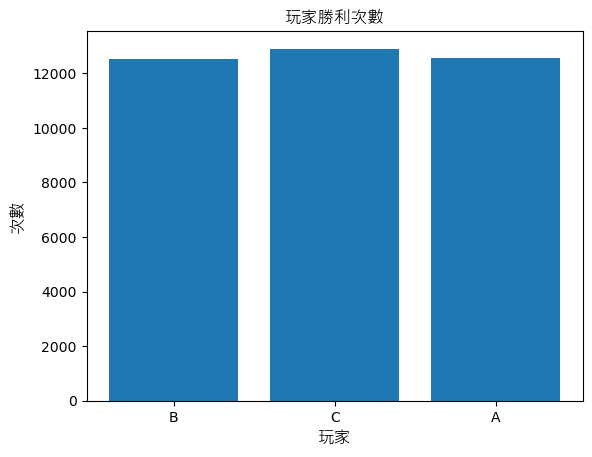

In [25]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from collections import Counter

# 設定中文字體路徑，替換為您系統中的實際字體文件路徑
font_path = 'C:/Windows/Fonts/msjh.ttc'
# 創建一個FontProperties對象，指定字體文件和字體大小
chinese_font = FontProperties(fname=font_path, size=12)

#print("winner",winner)

winner_counts = Counter(winner)
winners = list(winner_counts.keys())
winner_counts = list(winner_counts.values())
# 添加標籤
plt.xlabel('玩家', fontproperties=chinese_font)
plt.ylabel('次數', fontproperties=chinese_font)
plt.title('玩家勝利次數', fontproperties=chinese_font)

plt.bar(winners,winner_counts)
#印出表格
data = list(zip(winners, winner_counts))
df = pd.DataFrame(data, columns=['winners', 'winner_counts'])

print(df.to_string(index=False))


#贏家勝利點位

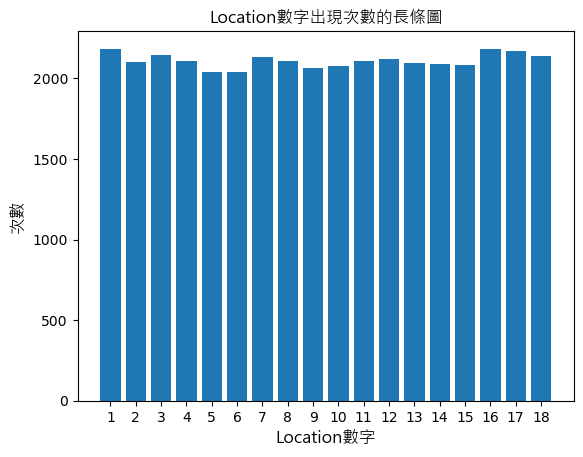

 locations   counts
         1     2183
         2     2102
         3     2147
         4     2107
         5     2039
         6     2041
         7     2134
         8     2110
         9     2067
        10     2078
        11     2105
        12     2123
        13     2096
        14     2092
        15     2081
        16     2184
        17     2171
        18     2140


In [26]:
#print("winner_location",winner_location)
# 使用Counter計算每個location數字的出現次數
location_counts = Counter(winner_location)

# 將結果轉換為兩個列表，一個包含location數字，另一個包含出現次數
locations = list(location_counts.keys())
counts = list(location_counts.values())

# 使用Matplotlib創建長條圖
plt.bar(locations, counts)
plt.xticks(locations)
# 添加標籤
plt.xlabel('Location數字', fontproperties=chinese_font)
plt.ylabel('次數', fontproperties=chinese_font)
plt.title('Location數字出現次數的長條圖', fontproperties=chinese_font)

# 顯示圖表
plt.show()

#顯示表格
data = list(zip(locations,  counts))
df = pd.DataFrame(data, columns=['locations', ' counts'])

#print(df.to_string(index=False))
sorted_df = df.sort_values(by='locations')

print(sorted_df.to_string(index=False))


In [27]:
#print("winner_money",winner_money)

losers  loser_counts
     C         12201
     B         12661
     A         13138


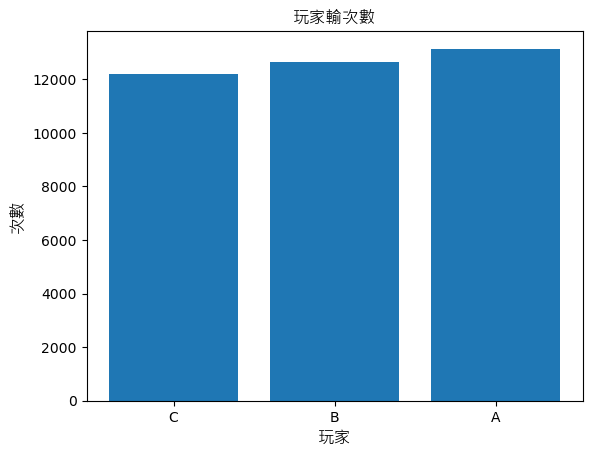

In [28]:
#print("loser",loser)
loser_counts = Counter(loser)
losers = list(loser_counts.keys())
loser_counts = list(loser_counts.values())
# 添加標籤
plt.xlabel('玩家', fontproperties=chinese_font)
plt.ylabel('次數', fontproperties=chinese_font)
plt.title('玩家輸次數', fontproperties=chinese_font)

plt.bar(losers,loser_counts)


#印出表格
data = list(zip(losers, loser_counts))
df = pd.DataFrame(data, columns=['losers', 'loser_counts'])

print(df.to_string(index=False))

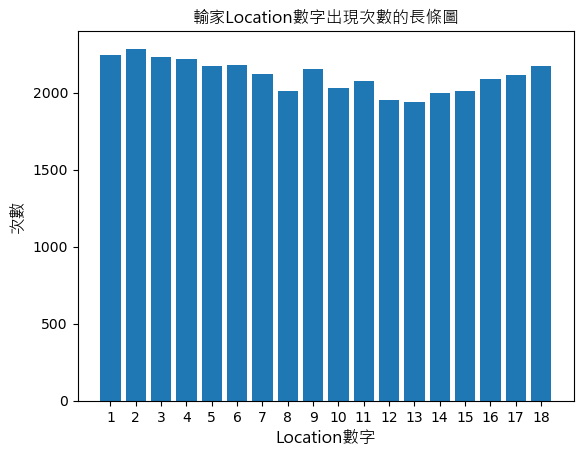

 locations   counts
         1     2245
         2     2286
         3     2230
         4     2219
         5     2172
         6     2179
         7     2120
         8     2011
         9     2153
        10     2028
        11     2074
        12     1953
        13     1943
        14     1996
        15     2013
        16     2088
        17     2118
        18     2172


In [29]:
#print("loser_location",loser_location)
location_counts = Counter(loser_location)

# 將結果轉換為兩個列表，一個包含location數字，另一個包含出現次數
locations = list(location_counts.keys())
counts = list(location_counts.values())

# 使用Matplotlib創建長條圖
plt.bar(locations, counts)
plt.xticks(locations)
# 添加標籤
plt.xlabel('Location數字', fontproperties=chinese_font)
plt.ylabel('次數', fontproperties=chinese_font)
plt.title('輸家Location數字出現次數的長條圖', fontproperties=chinese_font)

# 顯示圖表
plt.show()


#顯示表格
data = list(zip(locations,  counts))
df = pd.DataFrame(data, columns=['locations', ' counts'])

#print(df.to_string(index=False))
sorted_df = df.sort_values(by='locations')

print(sorted_df.to_string(index=False))


In [30]:
#print("loser_money",loser_money)


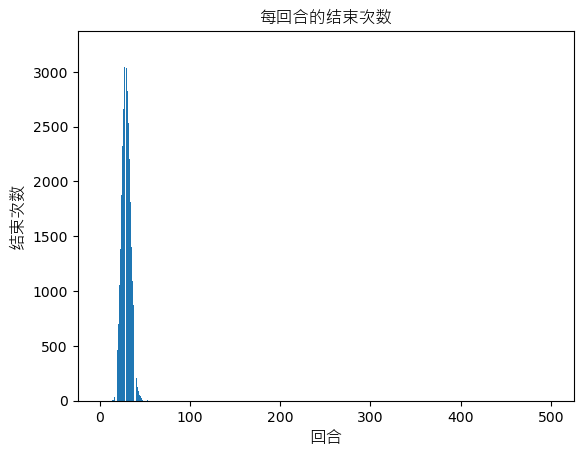

In [31]:
#print("round_count",round_count)
plt.bar(range(1, len(round_count) + 1), round_count)

# 添加标签
plt.xlabel('回合', fontproperties=chinese_font)
plt.ylabel('结束次数', fontproperties=chinese_font)
plt.title('每回合的结束次数', fontproperties=chinese_font)

# 显示图表
plt.show()
# 假设你已经有了 round_count 列表
data = {'回合': list(range(1, len(round_count) + 1)),
        '結束次數': round_count}

# 创建DataFrame
df = pd.DataFrame(data)

# 打印DataFrame
#print(df)
df.to_csv('round_count.csv', index=False, encoding='utf-8')

In [6]:
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 22],
    'Country': ['USA', 'Canada', 'UK']
}

df = pd.DataFrame(data)
print(df)


      Name  Age Country
0    Alice   25     USA
1      Bob   30  Canada
2  Charlie   22      UK


In [18]:
# 假设你有一个字典 data 和一个特定的除数 divisor
data = {10,20,30}
divisor = 5


print(type(data))
for key in data:
    if isinstance((int, float)):  # 确保值是数字
        data[key] /= divisor

print(data)


<class 'set'>


TypeError: isinstance expected 2 arguments, got 1